In [1]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data/reddit.csv')

display(data.head())

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [3]:
data.shape

(37249, 2)

In [4]:
data.sample()['clean_comment'].values

array(['reducing the mea passport office shouldnt lauded honest sushma aadh baar toh videsh jaane dete feel bad for her '],
      dtype=object)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [6]:
data.dropna(inplace=True)

In [7]:
data.drop_duplicates(inplace=True)


In [8]:
data[(data['clean_comment'].str.strip() == '')]

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [9]:
data = data[~(data['clean_comment'].str.strip() == '')]

In [10]:
data['clean_comment'] = data['clean_comment'].str.lower()
data.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [11]:
data[data['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37241,let the janta decide not ulema clerics,0
37242,hona hai same with vaccination education insu...,0
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [12]:
print(data['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' ')).sum())

data['clean_comment'] = data['clean_comment'].str.strip()

print(data['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' ')).sum())

32266
0


check if comment has a url

In [13]:
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comments_with_urls = data[data['clean_comment'].str.contains(url_pattern, regex=True)]

comments_with_urls.head()


,clean_comment,category


check if comment has '\n'

In [14]:
comments_with_newline = data[data['clean_comment'].str.contains('\n')]

comments_with_newline.head()

,clean_comment,category
448,what missing jpg\nand why this brilliant edit ...,1
781,india has been ruined congress and populist sc...,-1
847,like aap for its stand corruption and making p...,-1
871,reduced trade\ndeficit stronger rupee aren the...,0
1354,amsa press conference australian maritime safe...,1


In [15]:
data['clean_comment'] = data['clean_comment'].str.replace('\n', ' ', regex=True)

comments_with_newline_remaining = data[data['clean_comment'].str.contains('\n')]
comments_with_newline_remaining

,clean_comment,category


**Exploratory Data Analysis (EDA)**

<Axes: xlabel='category', ylabel='count'>

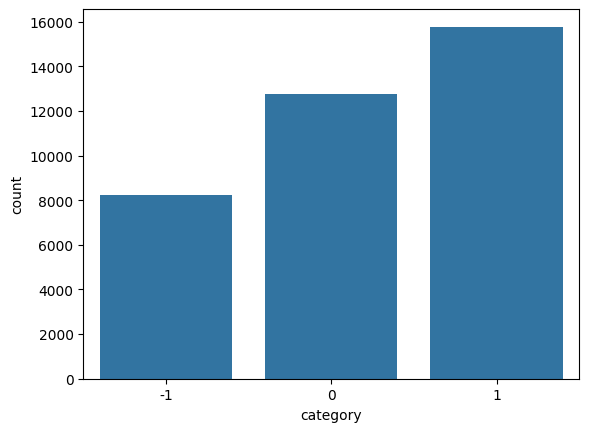

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data,x='category')

percantage of cotegories

In [17]:
data['category'].value_counts(normalize=True).mul(100).round(2)

category
 1    42.86
 0    34.71
-1    22.42
Name: proportion, dtype: float64

Count words in each comment

In [18]:
data['word_count'] = data['clean_comment'].apply(lambda x: len(x.split()))
data.sample(5)

,clean_comment,category,word_count
19005,man cartoonists are having field day with modi...,1,17
20265,supporting kkr because dinesh karthik who are ...,1,13
35708,thank you modiji very cool,1,5
8324,5ppr julius thomas clive walford,0,5
13757,anti romeo squads are huge hit meerut and muza...,1,41


In [19]:
data['word_count'].describe()

count    36793.000000
mean        29.667464
std         56.790738
min          1.000000
25%          6.000000
50%         13.000000
75%         30.000000
max       1307.000000
Name: word_count, dtype: float64

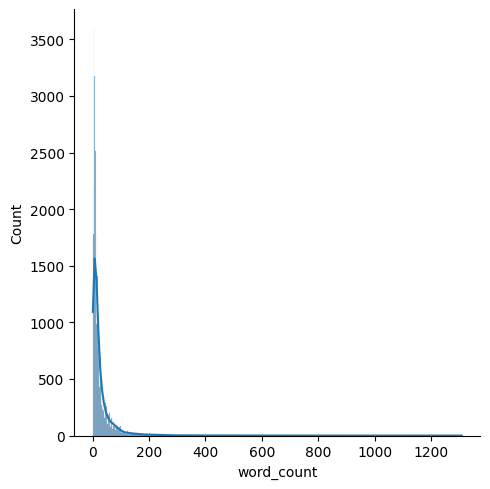

In [20]:
sns.displot(data['word_count'], kde=True)

<function matplotlib.pyplot.show(close=None, block=None)>

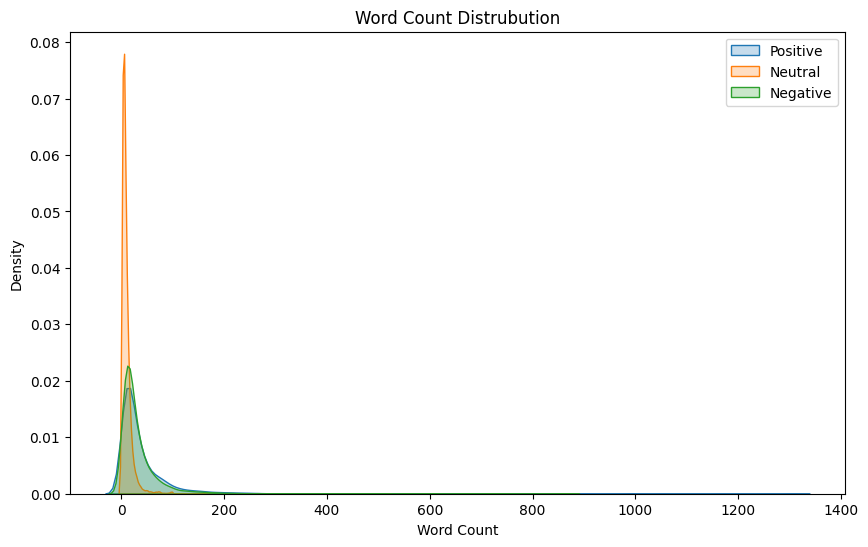

In [21]:
plt.figure(figsize=(10, 6))

sns.kdeplot(data[data['category'] == 1]['word_count'], label='Positive', fill=True)
sns.kdeplot(data[data['category'] == 0]['word_count'], label='Neutral', fill=True)
sns.kdeplot(data[data['category'] == -1]['word_count'], label='Negative', fill=True)

plt.title('Word Count Distrubution')
plt.xlabel('Word Count')
plt.ylabel('Density')

plt.legend()

plt.show

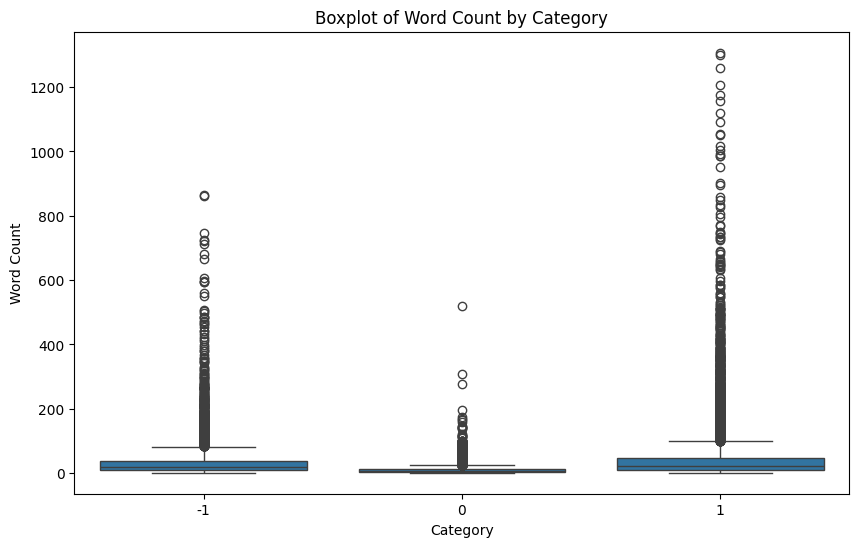

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='category', y='word_count')
plt.title('Boxplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

<Axes: xlabel='category', ylabel='word_count'>

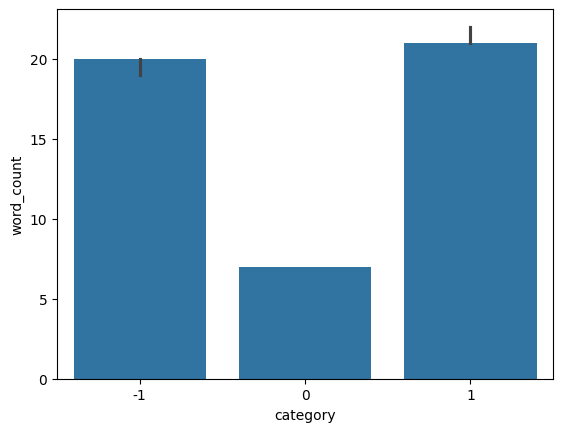

In [23]:
sns.barplot(data, x='category', y='word_count', estimator='median')

In [24]:
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

data['num_stop_words'] = data['clean_comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Arif\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
data.sample(5)

,clean_comment,category,word_count,num_stop_words
15431,fabricated their dates and they had records fo...,1,36,14
35051,ेी िों ा ू ेा ा ै ू,0,8,0
850,why you hate other parties apart from aap how ...,-1,49,22
20727,inn madharchodon gaand mein savarkar mercy pet...,1,20,0
19587,how you handle questions your objectivity from...,0,39,21


In [26]:
print(stop_words)

{"hadn't", 'yours', 'no', 'hasn', 'aren', 'myself', 'its', 'where', "he'd", 'o', 'how', 'i', 'over', 'needn', 'them', 'against', 'under', 'a', 'those', 'were', "don't", 's', 'you', 'between', 'itself', 'further', 'wouldn', 'the', 'too', 'y', 'yourselves', "needn't", "i'd", 'what', 'did', "she'll", "we've", 'once', 'by', 'him', 'after', 'when', 'only', 'shouldn', 'am', "should've", "they'll", 'has', 'down', 'having', "doesn't", 'for', 'he', 'ma', 'both', 'from', 'isn', 'should', 'than', "mightn't", "it'd", 'why', "he's", 'ain', 'have', 'ourselves', "isn't", 'to', 'few', 'nor', "hasn't", 'll', 'don', 'it', 'some', 'your', 'yourself', 'had', 'just', 'herself', 'that', 'so', 'very', 'more', 'whom', "they've", 'my', "mustn't", 'doing', 'mightn', 'there', "i'm", 'which', 'be', 'who', "you'll", 'here', 'hadn', 'didn', "she'd", "shan't", 'until', 'does', 'we', 'his', 'her', "it's", "she's", 'an', "haven't", 'was', 're', 'couldn', "you've", 'same', "that'll", 'is', 'up', 'these', "i've", "would

stop words median

<Axes: xlabel='category', ylabel='num_stop_words'>

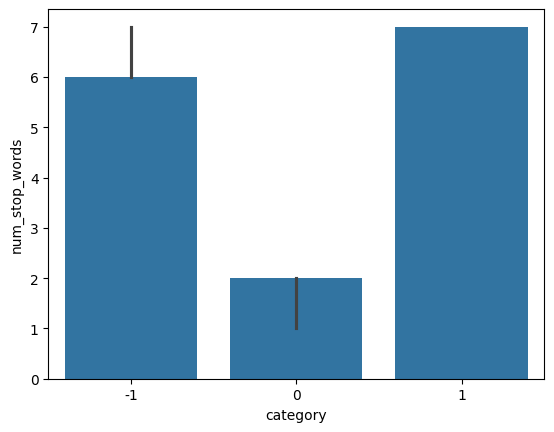

In [27]:
sns.barplot(data,x='category', y='num_stop_words', estimator='median')

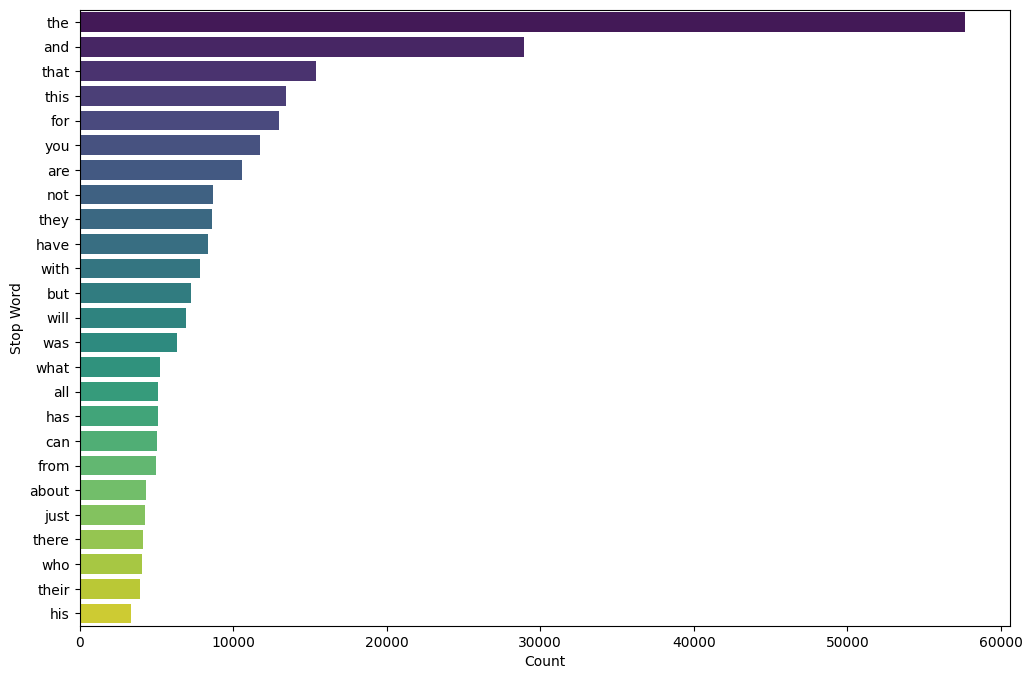

In [28]:
from collections import Counter

all_stop_words = [word for comment in data['clean_comment'] for word in comment.split() if word in stop_words]

most_common_stop_words = Counter(all_stop_words).most_common(25)

top_25_data = pd.DataFrame(most_common_stop_words, columns=['stop_word', 'count'])

plt.figure(figsize=(12,8))
sns.barplot(data=top_25_data, x='count', y='stop_word', palette='viridis')
plt.xlabel('Count')
plt.ylabel('Stop Word')
plt.show()

In [29]:
data['num_chars'] = data['clean_comment'].apply(len)

data.sample(5)

,clean_comment,category,word_count,num_stop_words,num_chars
19291,think lot the problem that there huge untapped...,1,41,13,258
22098,bengaluru setback for bjp two independent mlas...,0,22,3,134
4534,the mod log not loading,1,5,2,23
24036,namo app not pmo app private app operated bjp ...,1,20,5,114
19483,supreme leader you have broken heart into alad...,-1,9,3,55


In [30]:
all_text = ' '.join(data['clean_comment'])

char_frequency = Counter(all_text)

char_frequency_data = pd.DataFrame(char_frequency.items(), columns=['characters', 'frequency']).sort_values(by='frequency', ascending=False)

See Bigrams

<function matplotlib.pyplot.show(close=None, block=None)>

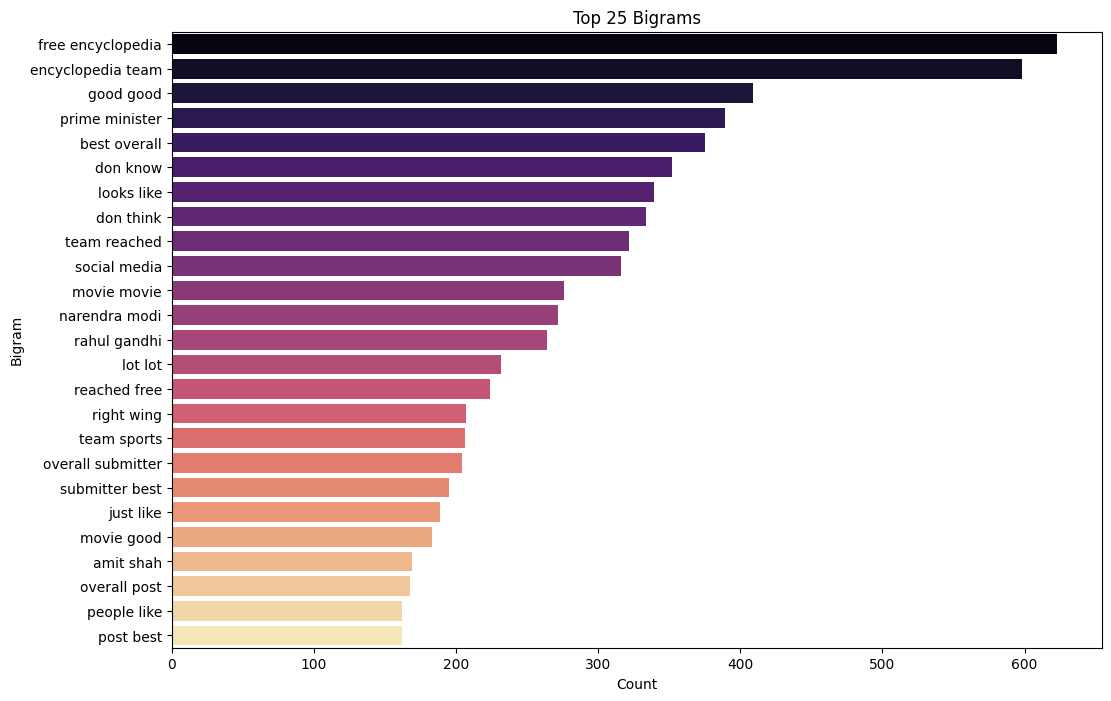

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

top_25_bigrams = get_top_ngrams(data['clean_comment'], 25)

top_25_bigrams_data = pd.DataFrame(top_25_bigrams, columns=['bigram', 'count'])

plt.figure(figsize=(12,8))
sns.barplot(data=top_25_bigrams_data, x='count', y='bigram', palette='magma')
plt.title('Top 25 Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

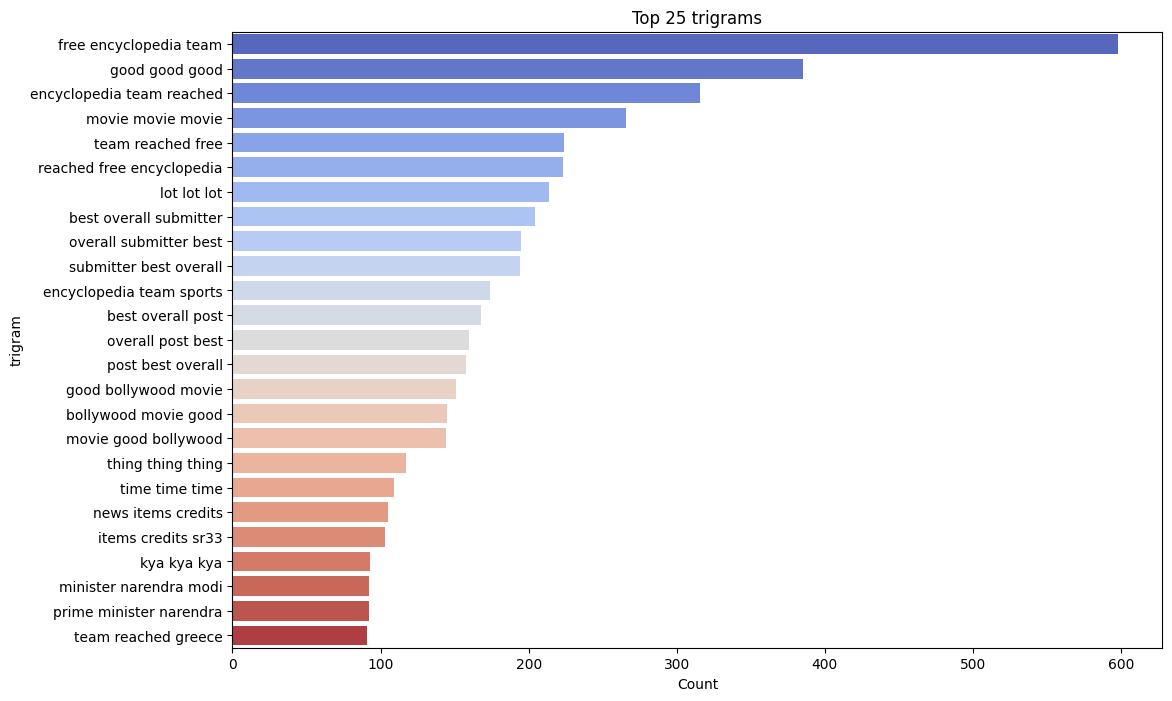

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3,3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

top_25_trigrams = get_top_trigrams(data['clean_comment'], 25)

top_25_trigrams_data = pd.DataFrame(top_25_trigrams, columns=['bigram', 'count'])

plt.figure(figsize=(12,8))
sns.barplot(data=top_25_trigrams_data, x='count', y='bigram', palette='coolwarm')
plt.title('Top 25 trigrams')
plt.xlabel('Count')
plt.ylabel('trigram')
plt.show

Remove non-english characters

In [33]:
import re

data['clean_comment'] = data['clean_comment'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x)))


In [34]:
all_text = ' '.join(data['clean_comment'])

char_frequency = Counter(all_text)

char_frequency_data = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

print(char_frequency_data)

   character  frequency
6               1091592
12         e     666610
13         t     491287
1          a     481134
3          i     401388
9          n     388465
7          o     379908
17         s     355279
8          r     331425
10         h     296748
4          l     250104
14         d     221980
18         u     170377
22         c     167821
2          m     155561
16         p     135139
21         g     132927
5          y     115420
25         w     110522
24         b      88199
0          f      78866
11         v      66020
20         k      62531
26         j      22906
15         x       9075
30         0       8477
19         z       5725
23         q       5136
31         1       4845
32         2       4638
34         9       1775
27         5       1631
35         3       1617
29         4       1573
28         6       1403
36         7       1291
33         8       1199
38                   76
37        \t         11
40                    3
39              

remove useless stopwords

In [45]:
stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}

data['clean_comment'] = data['clean_comment'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)

Lemmatization

In [38]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

data['clean_comment'] = data['clean_comment'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()
]))

data.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Arif\AppData\Roaming\nltk_data...


,clean_comment,category,word_count,num_stop_words,num_chars
0,family mormon never tried explain still stare ...,1,39,13,259
1,buddhism much lot compatible christianity espe...,1,196,59,1268
2,seriously say thing first get complex explain ...,-1,86,40,459
3,learned want teach different focus goal not wr...,0,29,15,167
4,benefit may want read living buddha living chr...,1,112,45,690


Wordcloud

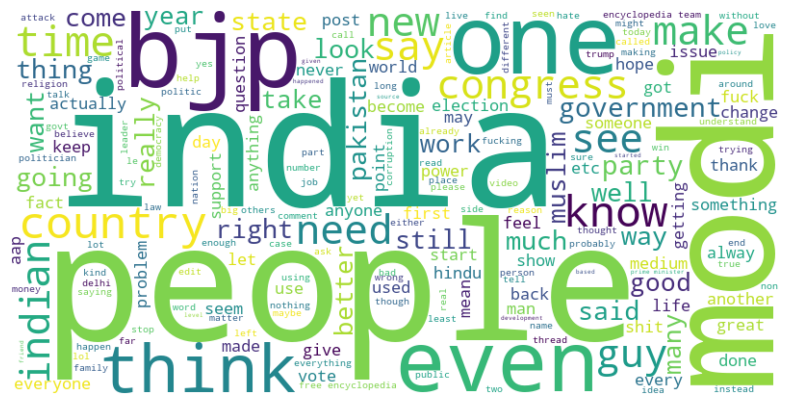

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(data['clean_comment'])

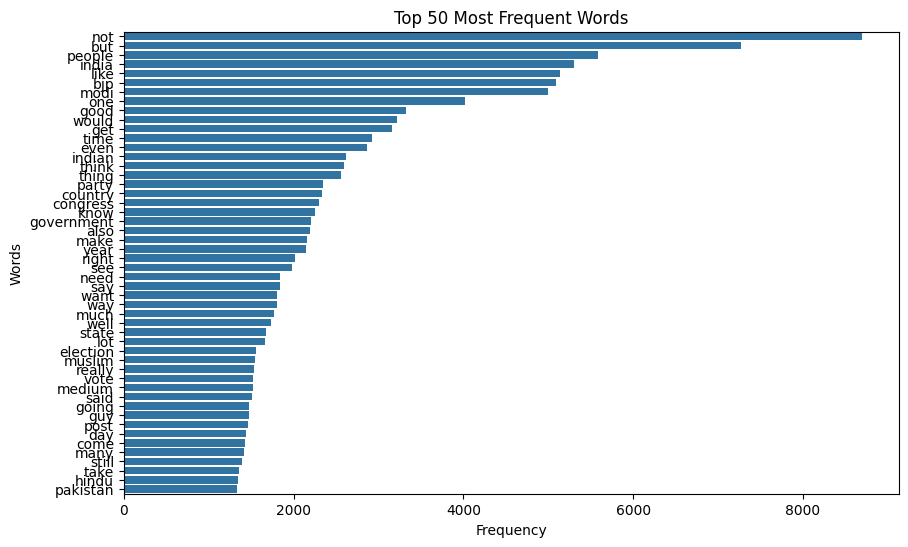

In [46]:
def plot_top_n_words(df, n=20):
    """Plot the top N most frequent words in the dataset."""
    # Flatten all words in the content column
    words = ' '.join(df['clean_comment']).split()

    # Get the top N most common words
    counter = Counter(words)
    most_common_words = counter.most_common(n)

    # Split the words and their counts for plotting
    words, counts = zip(*most_common_words)

    # Plot the top N words
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f'Top {n} Most Frequent Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Example usage
plot_top_n_words(data, n=50)


In [48]:
# Let's compare the top words from both methods
from collections import Counter

# Method 1: Words used in bar plot
words_barplot = ' '.join(data['clean_comment']).split()
counter_barplot = Counter(words_barplot)
top_10_barplot = counter_barplot.most_common(10)

print("Top 10 words from bar plot method:")
for word, count in top_10_barplot:
    print(f"{word}: {count}")

print("\n" + "="*50 + "\n")

# Method 2: Words used in word cloud  
wordcloud_text = ' '.join(data['clean_comment'])
words_wordcloud = wordcloud_text.split()
counter_wordcloud = Counter(words_wordcloud)
top_10_wordcloud = counter_wordcloud.most_common(10)

print("Top 10 words from word cloud method:")
for word, count in top_10_wordcloud:
    print(f"{word}: {count}")

print(f"\nAre the methods using the same data? {top_10_barplot == top_10_wordcloud}")
print(f"Is 'not' in the top 10? {'not' in [word for word, count in top_10_barplot]}")

Top 10 words from bar plot method:
not: 8695
but: 7269
people: 5582
india: 5304
like: 5140
bjp: 5086
modi: 4998
one: 4021
good: 3323
would: 3218


Top 10 words from word cloud method:
not: 8695
but: 7269
people: 5582
india: 5304
like: 5140
bjp: 5086
modi: 4998
one: 4021
good: 3323
would: 3218

Are the methods using the same data? True
Is 'not' in the top 10? True
